In [9]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
df = pd.read_csv("APPRAISE_NETFLOW.csv").dropna()
df.loc[:,'FLOW_DURATION'] = df['LAST_SWITCHED'] - df['FIRST_SWITCHED']
prediction = df[['FLOW_DURATION','IN_BYTES', 'OUT_BYTES', 'IN_PKTS', 'OUT_PKTS']]


In [26]:
sample_df = prediction.sample(n=10000, random_state=42)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(sample_df)

tsne = TSNE(n_components=2, random_state=42, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_tsne)
# clusters = kmeans.fit_predict(X_scaled)

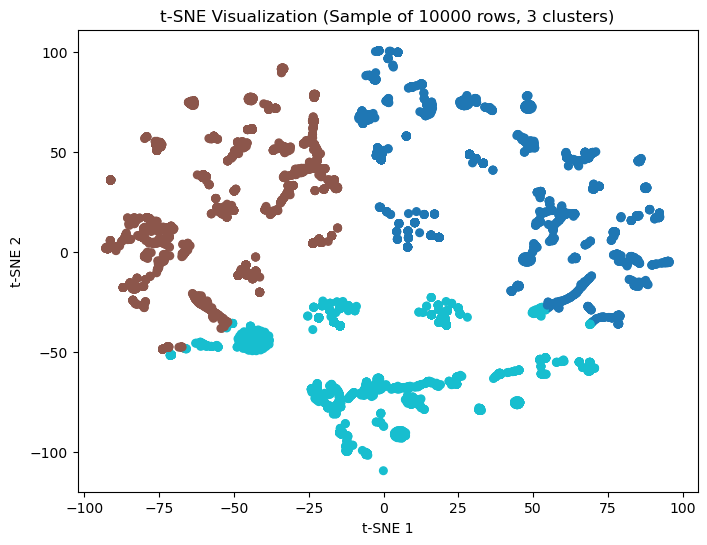

In [27]:
sample_df = sample_df.copy()
sample_df['TSNE1'] = X_tsne[:, 0]
sample_df['TSNE2'] = X_tsne[:, 1]
sample_df['Cluster'] = clusters

plt.figure(figsize=(8,6))
plt.scatter(sample_df['TSNE1'], sample_df['TSNE2'], 
            c=sample_df['Cluster'], cmap='tab10', s=30)
plt.title('t-SNE Visualization (Sample of 10000 rows, 3 clusters)')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()

In [20]:

print("Cluster Centers (scaled):")
print(kmeans.cluster_centers_)

# scaled_centers = kmeans.cluster_centers_
# original_centers = scaler.inverse_transform(scaled_centers)

# cluster_centers_df = pd.DataFrame(original_centers, columns=prediction.columns)
# print(cluster_centers_df)

Cluster Centers (scaled):
[[ -39.902767  -23.15239 ]
 [  19.69549    99.63011 ]
 [  27.418732  -75.5757  ]
 [-105.14114    51.124706]
 [  83.257675   12.543956]]
